<a href="https://colab.research.google.com/github/Luchinps/Coderhouse-DC/blob/main/Trabajo_CoderHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# El Dataset

El dataset esta conformado por diferentes alimentos y sus bases nutricionales como vitaminas, grasas, proteínas,etc.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/TP_FINAL_CD/Food.csv', sep = ';')
df

,Description,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Sodium_(mg),Zinc_(mg),...,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2
0,"BUTTER,WITH SALT",717.0,0.85,81.11,0.06,0.0,0.06,24.0,643.0,0.09,...,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp
1,"BUTTER,WHIPPED,W/ SALT",718.0,0.49,78.30,2.87,0.0,0.06,23.0,583.0,0.05,...,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp
2,"BUTTER OIL,ANHYDROUS",876.0,0.28,99.48,0.00,0.0,0.00,4.0,2.0,0.01,...,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup
3,"CHEESE,BLUE",353.0,21.40,28.74,2.34,0.0,0.50,528.0,1146.0,2.66,...,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch
4,"CHEESE,BRICK",371.0,23.24,29.68,2.79,0.0,0.51,674.0,560.0,2.60,...,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,"MACKEREL,SALTED",305.0,18.50,25.10,0.00,0.0,0.00,66.0,4450.0,1.10,...,1006.0,7.8,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless"
8786,"SCALLOP,(BAY&SEA),CKD,STMD",111.0,20.54,0.84,5.41,0.0,0.00,10.0,667.0,1.55,...,2.0,0.0,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN
8787,"SYRUP,CANE",269.0,0.00,0.00,73.14,0.0,73.20,13.0,58.0,0.19,...,0.0,0.0,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN
8788,"SNAIL,RAW",90.0,16.10,1.40,2.00,0.0,0.00,10.0,70.0,1.00,...,0.0,0.1,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN


In [ ]:
for x in df.columns:
  print(x)

Description
Energ_Kcal
Protein_(g)
Lipid_Tot_(g)
Carbohydrt_(g)
Fiber_TD_(g)
Sugar_Tot_(g)
Calcium_(mg)
Sodium_(mg)
Zinc_(mg)
Manganese_(mg)
Selenium_(µg)
Vit_C_(mg)
Niacin_(mg)
Vit_B6_(mg)
Vit_B12_(µg)
Vit_A_IU
Retinol_(µg)
Vit_E_(mg)
Vit_D_IU
Vit_K_(µg)
FA_Sat_(g)
FA_Mono_(g)
FA_Poly_(g)
Cholestrl_(mg)
GmWt_1
GmWt_Desc1
GmWt_2
GmWt_Desc2


Podemos observar que las unidades no estan iguales, por eso voy a pasar todo a **mg** para no generar confusiones.

In [57]:
# Columnas a convertir de gramos a miligramos
cols_g_to_mg = [df.columns[2], df.columns[3], df.columns[4], df.columns[5],df.columns[6],df.columns[21], df.columns[22], df.columns[23]]

# Columnas a convertir de microgramos a miligramos
cols_µg_to_mg = [df.columns[11],df.columns[15],df.columns[16],df.columns[17],df.columns[19], df.columns[20]]

# Convertir de gramos (g) a miligramos (mg)
for col in cols_g_to_mg:
    df[col] = df[col] * 1000
    df.rename(columns={col: col.replace('(g)', '(mg)')}, inplace=True)

# Convertir de microgramos (µg) a miligramos (mg)
for col in cols_µg_to_mg:
    df[col] = df[col] * 0.001
    df.rename(columns={col: col.replace('(µg)', '(mg)')}, inplace=True)

df.columns


Index(['Description', 'Energ_Kcal', 'Protein_(mg)', 'Lipid_Tot_(mg)',
       'Carbohydrt_(mg)', 'Fiber_TD_(mg)', 'Sugar_Tot_(mg)', 'Calcium_(mg)',
       'Sodium_(mg)', 'Zinc_(mg)', 'Manganese_(mg)', 'Selenium_(mg)',
       'Vit_C_(mg)', 'Niacin_(mg)', 'Vit_B6_(mg)', 'Vit_B12_(mg)', 'Vit_A_IU',
       'Retinol_(mg)', 'Vit_E_(mg)', 'Vit_D_IU', 'Vit_K_(mg)', 'FA_Sat_(mg)',
       'FA_Mono_(mg)', 'FA_Poly_(mg)', 'Cholestrl_(mg)'],
      dtype='object')

In [58]:
#Voy a completar los datos nulos por 0, ya que en este caso poner la media o la mediana no estaria bien
df.fillna(0, inplace=True)
df

,Description,Energ_Kcal,Protein_(mg),Lipid_Tot_(mg),Carbohydrt_(mg),Fiber_TD_(mg),Sugar_Tot_(mg),Calcium_(mg),Sodium_(mg),Zinc_(mg),...,Vit_B12_(mg),Vit_A_IU,Retinol_(mg),Vit_E_(mg),Vit_D_IU,Vit_K_(mg),FA_Sat_(mg),FA_Mono_(mg),FA_Poly_(mg),Cholestrl_(mg)
0,"BUTTER,WITH SALT",717.0,850000.0,81110000.0,60000.0,0.0,60000.0,24.0,643.0,0.09,...,1.700000e-07,0.002499,0.000671,2.32,0.000000,7.000000e-06,51368000.0,21021000.0,3043000.0,215.0
1,"BUTTER,WHIPPED,W/ SALT",718.0,490000.0,78300000.0,2870000.0,0.0,60000.0,23.0,583.0,0.05,...,7.000000e-08,0.002468,0.000671,1.37,0.000000,4.600000e-06,45390000.0,19874000.0,3331000.0,225.0
2,"BUTTER OIL,ANHYDROUS",876.0,280000.0,99480000.0,0.0,0.0,0.0,4.0,2.0,0.01,...,1.000000e-08,0.003069,0.000824,2.80,0.000000,8.600000e-06,61924000.0,28732000.0,3694000.0,256.0
3,"CHEESE,BLUE",353.0,21400000.0,28740000.0,2340000.0,0.0,500000.0,528.0,1146.0,2.66,...,1.220000e-06,0.000721,0.000192,0.25,0.000021,2.400000e-06,18669000.0,7778000.0,800000.0,75.0
4,"CHEESE,BRICK",371.0,23240000.0,29680000.0,2790000.0,0.0,510000.0,674.0,560.0,2.60,...,1.260000e-06,0.001080,0.000286,0.26,0.000022,2.500000e-06,18764000.0,8598000.0,784000.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,"MACKEREL,SALTED",305.0,18500000.0,25100000.0,0.0,0.0,0.0,66.0,4450.0,1.10,...,1.200000e-05,0.000157,0.000047,2.38,0.001006,7.800000e-06,7148000.0,8320000.0,6210000.0,95.0
8786,"SCALLOP,(BAY&SEA),CKD,STMD",111.0,20540000.0,840000.0,5410000.0,0.0,0.0,10.0,667.0,1.55,...,2.150000e-06,0.000005,0.000002,0.00,0.000002,0.000000e+00,218000.0,82000.0,222000.0,41.0
8787,"SYRUP,CANE",269.0,0.0,0.0,73140000.0,0.0,73200000.0,13.0,58.0,0.19,...,0.000000e+00,0.000000,0.000000,0.00,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
8788,"SNAIL,RAW",90.0,16100000.0,1400000.0,2000000.0,0.0,0.0,10.0,70.0,1.00,...,5.000000e-07,0.000100,0.000030,5.00,0.000000,1.000000e-07,361000.0,259000.0,252000.0,50.0


In [7]:
#Elimino las columnas que no me interesan y que los datos estan en unidades que no se entienden
df = df.drop(columns=['GmWt_1', 'GmWt_Desc1', 'GmWt_2', 'GmWt_Desc2'])
df

,Description,Energ_Kcal,Protein_(mg),Lipid_Tot_(mg),Carbohydrt_(mg),Fiber_TD_(mg),Sugar_Tot_(mg),Calcium_(mg),Sodium_(mg),Zinc_(mg),...,Vit_B12_(mg),Vit_A_IU,Retinol_(mg),Vit_E_(mg),Vit_D_IU,Vit_K_(mg),FA_Sat_(mg),FA_Mono_(mg),FA_Poly_(mg),Cholestrl_(mg)
0,"BUTTER,WITH SALT",717.0,850.0,81110.0,60.0,0.0,60.0,24.0,643.0,0.09,...,0.00017,2.499,0.671,2.32,0.000,0.0070,51368.0,21021.0,3043.0,215.0
1,"BUTTER,WHIPPED,W/ SALT",718.0,490.0,78300.0,2870.0,0.0,60.0,23.0,583.0,0.05,...,0.00007,2.468,0.671,1.37,0.000,0.0046,45390.0,19874.0,3331.0,225.0
2,"BUTTER OIL,ANHYDROUS",876.0,280.0,99480.0,0.0,0.0,0.0,4.0,2.0,0.01,...,0.00001,3.069,0.824,2.80,0.000,0.0086,61924.0,28732.0,3694.0,256.0
3,"CHEESE,BLUE",353.0,21400.0,28740.0,2340.0,0.0,500.0,528.0,1146.0,2.66,...,0.00122,0.721,0.192,0.25,0.021,0.0024,18669.0,7778.0,800.0,75.0
4,"CHEESE,BRICK",371.0,23240.0,29680.0,2790.0,0.0,510.0,674.0,560.0,2.60,...,0.00126,1.080,0.286,0.26,0.022,0.0025,18764.0,8598.0,784.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,"MACKEREL,SALTED",305.0,18500.0,25100.0,0.0,0.0,0.0,66.0,4450.0,1.10,...,0.01200,0.157,0.047,2.38,1.006,0.0078,7148.0,8320.0,6210.0,95.0
8786,"SCALLOP,(BAY&SEA),CKD,STMD",111.0,20540.0,840.0,5410.0,0.0,0.0,10.0,667.0,1.55,...,0.00215,0.005,0.002,0.00,0.002,0.0000,218.0,82.0,222.0,41.0
8787,"SYRUP,CANE",269.0,0.0,0.0,73140.0,0.0,73200.0,13.0,58.0,0.19,...,0.00000,0.000,0.000,0.00,0.000,0.0000,0.0,0.0,0.0,0.0
8788,"SNAIL,RAW",90.0,16100.0,1400.0,2000.0,0.0,0.0,10.0,70.0,1.00,...,0.00050,0.100,0.030,5.00,0.000,0.0001,361.0,259.0,252.0,50.0


# **Gráficos**

# Primeras preguntas

1 - ¿Cómo se distribuyen las calorías en función del contenido de grasas totales?

2 - ¿Cuál es la relación entre el contenido de fibra y la cantidad de carbohidratos en los alimentos?

3 - ¿Cómo varían los niveles de sodio en función del contenido de grasa saturada en los alimentos?

4 - ¿Cómo se relacionan el contenido de fibra y el contenido de carbohidratos en los alimentos?

5 - ¿Cuál es la relación entre el contenido de proteínas y el aporte calórico de los alimentos?

6 -¿Cuales son las correlaciones entre diferentes valores nutricionales?

**Primera pregunta:**

¿Cómo se distribuyen las calorías en función del contenido de grasas totales?


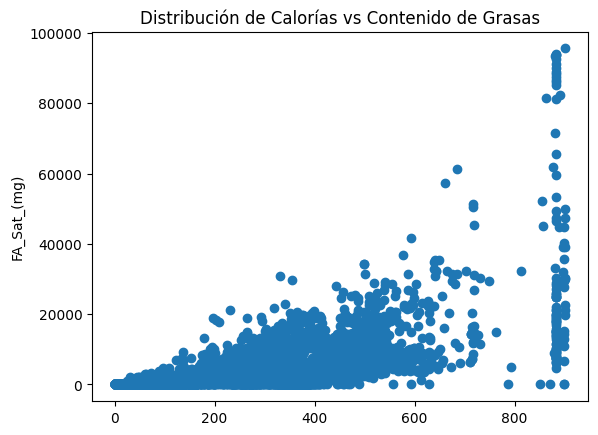

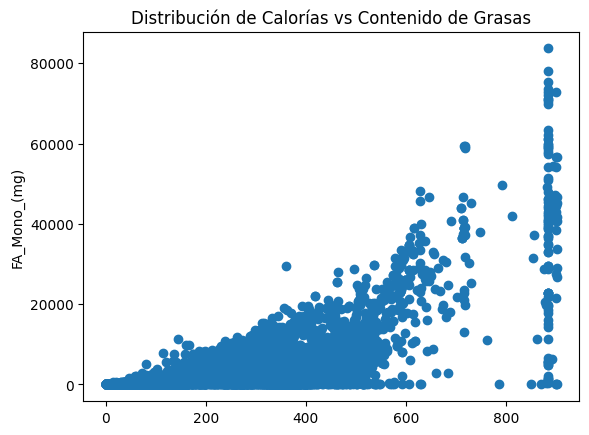

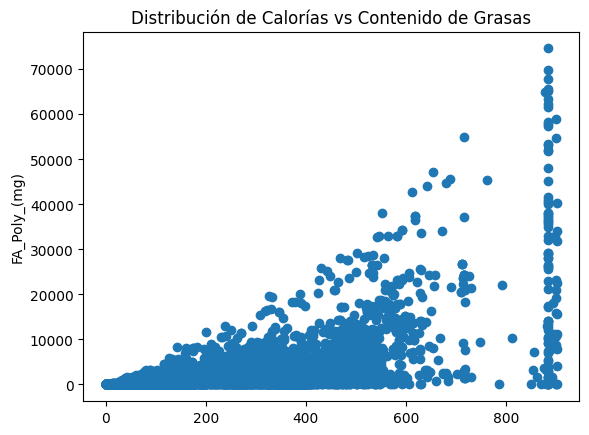

In [17]:
columns = ['FA_Sat_(mg)', 'FA_Mono_(mg)', 'FA_Poly_(mg)']
for col in columns:
  plt.scatter(x=df['Energ_Kcal'], y = df[col])
  plt.title('Distribución de Calorías vs Contenido de Grasas')
  plt.ylabel('Energía (kcal)')
  plt.ylabel(f'{col}')
  plt.show()

**Segunda pregunta**

¿Cuál es la relación entre el contenido de fibra y la cantidad de carbohidratos en los alimentos?

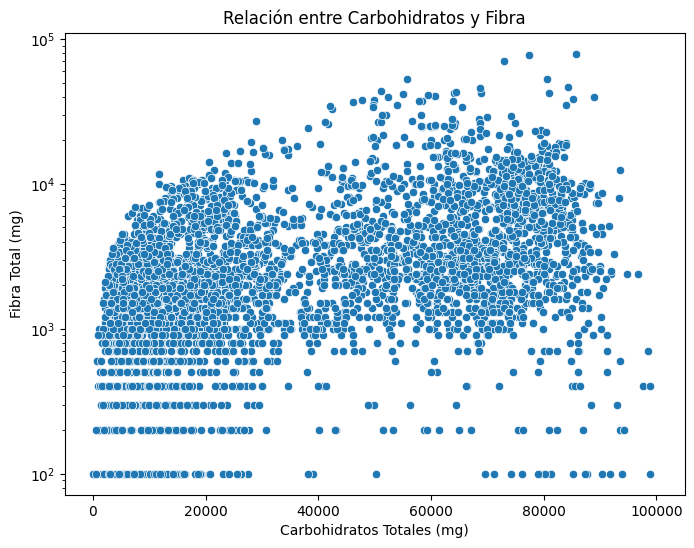

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Carbohydrt_(mg)', y='Fiber_TD_(mg)')
plt.title('Relación entre Carbohidratos y Fibra')
plt.xlabel('Carbohidratos Totales (mg)')
plt.ylabel('Fibra Total (mg)')
plt.yscale('log')
plt.show()

**Tercera pregunta**

¿Cómo varían los niveles de sodio en función del contenido de grasa saturada en los alimentos?

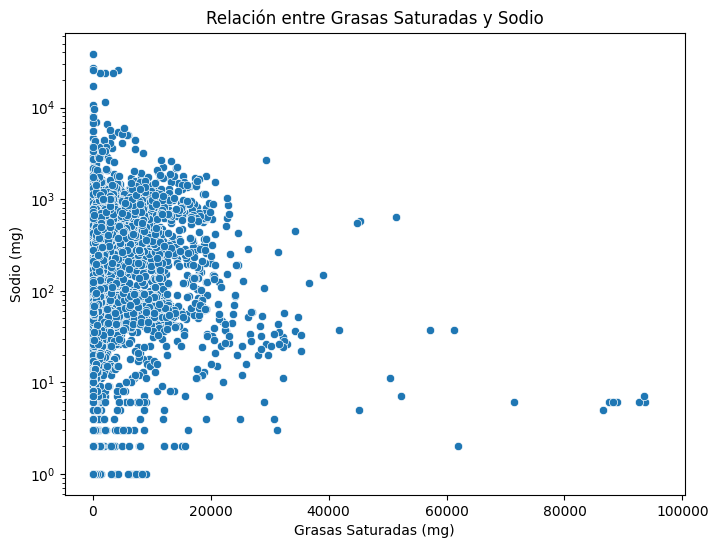

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='FA_Sat_(mg)', y='Sodium_(mg)')
plt.title('Relación entre Grasas Saturadas y Sodio')
plt.xlabel('Grasas Saturadas (mg)')
plt.ylabel('Sodio (mg)')
plt.yscale('log')
plt.show()


**Cuarta pregunta**

¿Cómo se relacionan el contenido de fibra y el contenido de carbohidratos en los alimentos?

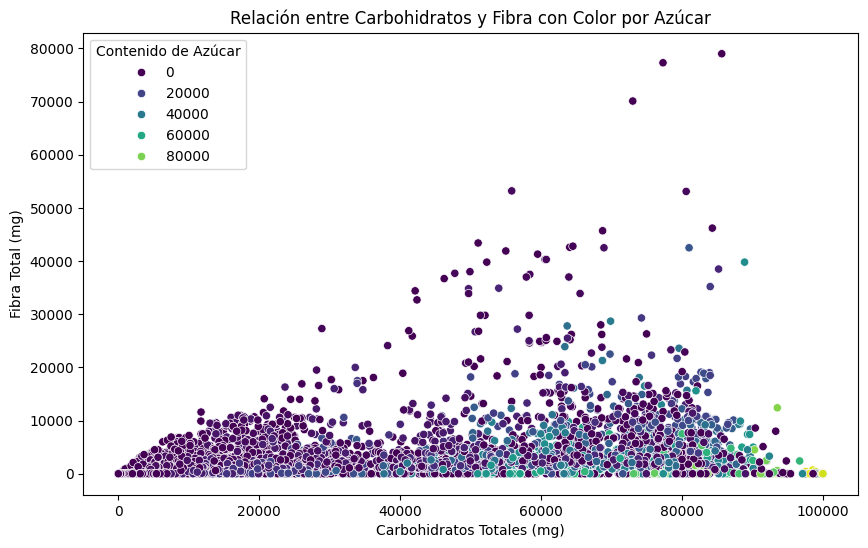

In [29]:
plt.figure(figsize=(10, 6))
df['Sugar_Tot_(mg)'] = df['Sugar_Tot_(mg)'].astype('float')
sns.scatterplot(data=df, x='Carbohydrt_(mg)', y='Fiber_TD_(mg)', hue='Sugar_Tot_(mg)', palette='viridis')
#Agrego el contenido de azucar como una variable mas ya que los carbohidratos en los alimentos suelen contener azúcares simples y fibra.
plt.title('Relación entre Carbohidratos y Fibra con Color por Azúcar')
plt.xlabel('Carbohidratos Totales (mg)')
plt.ylabel('Fibra Total (mg)')
plt.legend(title='Contenido de Azúcar')
plt.show()


**Quinta pregunta**

¿Cuál es la relación entre el contenido de proteínas y el aporte calórico de los alimentos?

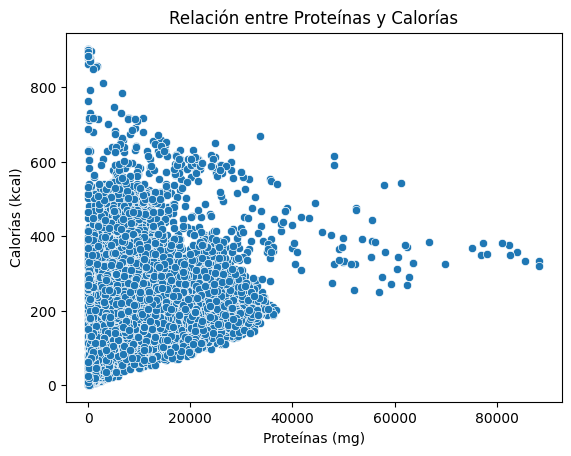

In [18]:
sns.scatterplot(data=df, x='Protein_(mg)', y='Energ_Kcal')
plt.title('Relación entre Proteínas y Calorías')
plt.xlabel('Proteínas (mg)')
plt.ylabel('Calorías (kcal)')
plt.show()


**Sexta pregunta**

Cuales son las correlaciones entre diferentes valores nutricionales?

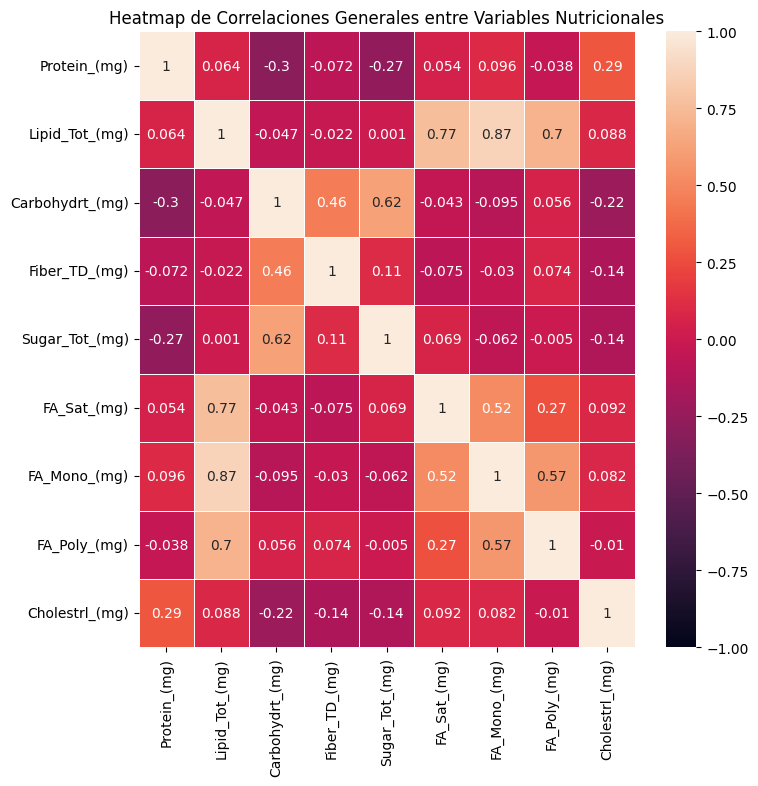

In [59]:
variables_relevantes = ['Protein_(mg)', 'Lipid_Tot_(mg)',
       'Carbohydrt_(mg)', 'Fiber_TD_(mg)', 'Sugar_Tot_(mg)', 'FA_Sat_(mg)',
       'FA_Mono_(mg)', 'FA_Poly_(mg)', 'Cholestrl_(mg)']

df_relevantes = df[variables_relevantes]

#Matriz de correlación
correlation_matrix = df_relevantes.corr().round(3)

#Creamos el heatmap
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, annot=True,  vmin=-1, vmax=1, linewidths=0.5)

plt.title('Heatmap de Correlaciones Generales entre Variables Nutricionales')
plt.show()



Podemos observar que las variables mas correlativas son:

La fibra con los carbohidratos y las grasas saturadas con las monosaturadas.

La fibra con los carbohidratos es algo que ya estuve relacionando en la cuarta pregunta, lo cual me gustaria seguir investigando el porque de esto y si hay mas variables que influyen en esta relación.
En cuanto a la relacion de las grasas saturadas con las monosaturadas, se debe a que las grasas saturadas y grasas monoinsaturadas son químicamente similares en el sentido de que ambas son tipos de ácidos grasos que contienen solo un enlace simple en su cadena principal de carbono, aunque las grasas monoinsaturadas tienen un único enlace doble.
Dejo foto de refencia:

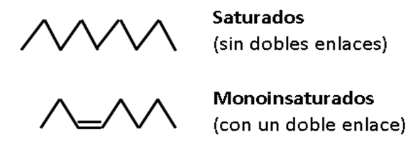
